## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [62]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [63]:
# Importing the data
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_stmnt = pd.read_excel("data/Income_Statement.xlsx")
print(balance_sheet.info())
balance_sheet.head()
print(income_stmnt.info())
income_stmnt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 60 non-null     int64  
 1   Year                       60 non-null     int64  
 2   comp_type                  60 non-null     object 
 3   company                    60 non-null     object 
 4   Accounts Payable           60 non-null     int64  
 5   Cash                       60 non-null     int64  
 6   Inventory                  44 non-null     float64
 7   Property Plant Equipment   60 non-null     int64  
 8   Short Term Investments     37 non-null     float64
 9   Total Assets               60 non-null     int64  
 10  Total Current Assets       60 non-null     int64  
 11  Total Current Liabilities  60 non-null     int64  
 12  Total Liab                 60 non-null     int64  
 13  Total Stockholder Equity   60 non-null     int64  
d

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [64]:
# Dropping Unnamed: 0 from balance sheet dataset
print(balance_sheet.columns.tolist())
print("--------------------")
balance_sheet.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
balance_sheet.head()
print(balance_sheet.columns.tolist())

['Unnamed: 0', 'Year', 'comp_type', 'company', 'Accounts Payable', 'Cash', 'Inventory', 'Property Plant Equipment', 'Short Term Investments', 'Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity']
--------------------
['Year', 'comp_type', 'company', 'Accounts Payable', 'Cash', 'Inventory', 'Property Plant Equipment', 'Short Term Investments', 'Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity']


In [65]:
# Merging the Balance sheet and Income statment into 1 table
df_ratios = pd.merge(balance_sheet,income_stmnt, on=["Year","comp_type","company"])
print(df_ratios.columns.tolist())
print(df_ratios.info())

# Dropping the "Unnamed: 0" column 
df_ratios = df_ratios.drop(columns = ["Unnamed: 0"],axis= 1)
print("----------------------------")
print(df_ratios.info())

['Year', 'comp_type', 'company', 'Accounts Payable', 'Cash', 'Inventory', 'Property Plant Equipment', 'Short Term Investments', 'Total Assets', 'Total Current Assets', 'Total Current Liabilities', 'Total Liab', 'Total Stockholder Equity', 'Unnamed: 0', 'Cost Of Goods Sold', 'Gross Profit', 'Operating Income', 'Total Operating Expenses', 'Total Revenue']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       60 non-null     int64  
 1   comp_type                  60 non-null     object 
 2   company                    60 non-null     object 
 3   Accounts Payable           60 non-null     int64  
 4   Cash                       60 non-null     int64  
 5   Inventory                  44 non-null     float64
 6   Property Plant Equipment   60 non-null     int64  
 7   Short Term Investments     37 no

In [66]:
# Computing debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]
df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       60 non-null     int64  
 1   comp_type                  60 non-null     object 
 2   company                    60 non-null     object 
 3   Accounts Payable           60 non-null     int64  
 4   Cash                       60 non-null     int64  
 5   Inventory                  44 non-null     float64
 6   Property Plant Equipment   60 non-null     int64  
 7   Short Term Investments     37 non-null     float64
 8   Total Assets               60 non-null     int64  
 9   Total Current Assets       60 non-null     int64  
 10  Total Current Liabilities  60 non-null     int64  
 11  Total Liab                 60 non-null     int64  
 12  Total Stockholder Equity   60 non-null     int64  
 13  Cost Of Goods Sold         60 non-null     int64  
 

In [67]:
# Computing gross_margin 
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"]-df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]
df_ratios.info()
df_ratios.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       60 non-null     int64  
 1   comp_type                  60 non-null     object 
 2   company                    60 non-null     object 
 3   Accounts Payable           60 non-null     int64  
 4   Cash                       60 non-null     int64  
 5   Inventory                  44 non-null     float64
 6   Property Plant Equipment   60 non-null     int64  
 7   Short Term Investments     37 non-null     float64
 8   Total Assets               60 non-null     int64  
 9   Total Current Assets       60 non-null     int64  
 10  Total Current Liabilities  60 non-null     int64  
 11  Total Liab                 60 non-null     int64  
 12  Total Stockholder Equity   60 non-null     int64  
 13  Cost Of Goods Sold         60 non-null     int64  
 

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio,profitability_ratio
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,161782000000,98392000000,63930000000,196244000000,260174000000,3.741004,0.378178
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,169559000000,104956000000,66288000000,208227000000,274515000000,4.957039,0.382332
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,212981000000,152836000000,108949000000,256868000000,365817000000,5.563512,0.417794
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,223546000000,170782000000,119437000000,274891000000,394328000000,6.961537,0.433096
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,42910000000,82933000000,42959000000,82884000000,125843000000,2.800313,0.659020


In [68]:
#Pivot_table vs Melt vs Groupby
pivot_table_data = df_ratios.pivot_table(index=["Year","comp_type","company"], aggfunc="mean")
print(pivot_table_data.head())
print("Pivot Data______________________")

melted_data = df_ratios.melt(id_vars=["Year","comp_type","company"], var_name="Parameter", value_name="Amount")
print(melted_data.head())
print("Melted Data______________________")

grouped_data = df_ratios.groupby(["Year","comp_type","company"])[["leverage_ratio", "profitability_ratio"]].mean().reset_index()
print(grouped_data.head())
print("Grouped Data______________________")

                        Accounts Payable  ...  profitability_ratio
Year comp_type company                    ...                     
2018 fmcg      KO             2719000000  ...             0.619038
               NSRGY         13045000000  ...             0.497875
               PEP            7213000000  ...             0.545615
               UL             9121000000  ...             0.436997
     real_est  AMT             130800000  ...             0.707289

[5 rows x 17 columns]
Pivot Data______________________
   Year comp_type company         Parameter        Amount
0  2019      tech    AAPL  Accounts Payable  4.623600e+10
1  2020      tech    AAPL  Accounts Payable  4.229600e+10
2  2021      tech    AAPL  Accounts Payable  5.476300e+10
3  2022      tech    AAPL  Accounts Payable  6.411500e+10
4  2019      tech    MSFT  Accounts Payable  9.382000e+09
Melted Data______________________
   Year comp_type company  leverage_ratio  profitability_ratio
0  2018      fmcg      KO     

In [69]:
# Calculate comp_type with the least profitability ratio
pivot_lowest_profitability = df_ratios.pivot_table(index=["Year","comp_type","company"],values=["leverage_ratio","profitability_ratio"],aggfunc="mean").reset_index()

print(pivot_lowest_profitability)
print("______________________________________")

lowest = pivot_table_data.sort_index(ascending=False).iloc[0,0]
print(lowest)

    Year comp_type company  leverage_ratio  profitability_ratio
0   2018      fmcg      KO        4.900536             0.619038
1   2018      fmcg   NSRGY        2.388561             0.497875
2   2018      fmcg     PEP        5.348395             0.545615
3   2018      fmcg      UL        5.362025             0.436997
4   2018  real_est     AMT        6.186241             0.707289
5   2018  real_est     BAM        9.992631             0.221751
6   2018  real_est     CCI        2.831389             0.656611
7   2018  real_est     SPG        9.430502             0.821450
8   2018  real_est      WY        1.906810             0.252006
9   2018      tech    AMZN        3.734827             0.402474
10  2018      tech    GOOG        1.310559             0.564761
11  2018      tech    META        1.156989             0.832462
12  2019      fmcg      KO        4.550919             0.607712
13  2019      fmcg   NSRGY        2.458730             0.497690
14  2019      fmcg     PEP        5.3122

In [70]:
# groupby to get lowest probability
groupby_lowest_profitability = df_ratios.groupby("comp_type")[["profitability_ratio"]].sum().sort_values("profitability_ratio",ascending=True).iloc[0,0]
print(groupby_lowest_profitability)


10.287916838537638


In [71]:
# Groupby df_ratios by comp_type and get the one with the lowest profitability ratio
groupby_comp_type = df_ratios.groupby("comp_type").agg({"profitability_ratio":"mean","leverage_ratio": "mean"})
print(groupby_comp_type.head())
print("__________________________")


# Select the name of the comp_type with the lowest profitability ratio
lowest_profitability_ratio = groupby_comp_type.sort_values(by="profitability_ratio", ascending=True)
lowest_profitability_ratio = round(lowest_profitability_ratio.iloc[0,0],1)
lowest_profitability = groupby_comp_type.index[0]
print(f"The industry with the lowest profitability ratio is: {lowest_profitability} with {lowest_profitability_ratio}")
print("__________________________")


# Select the name of the comp_type with the highest leverage ratio
highest_leverage_ratio = groupby_comp_type.sort_values(by="leverage_ratio", ascending= False).iloc[0,1]
highest_leverage_ratio = round(highest_leverage_ratio,2)
highest_leverage = groupby_comp_type.sort_values("leverage_ratio",ascending= False).index[0]
print(f"The industry with the highest leverage ratio is: {highest_leverage} with {highest_leverage_ratio}")
print("__________________________")

           profitability_ratio  leverage_ratio
comp_type                                     
fmcg                  0.514396        4.049784
real_est              0.534848        7.353476
tech                  0.572062        2.777448
__________________________
The industry with the lowest profitability ratio is: fmcg with 0.5
__________________________
The industry with the highest leverage ratio is: real_est with 7.35
__________________________


    Year comp_type company  ...  Total Revenue  leverage_ratio  profitability_ratio
20  2018  real_est     BAM  ...    58489000000        9.992631             0.221751
21  2019  real_est     BAM  ...    71609000000       10.495303             0.263668
22  2020  real_est     BAM  ...    62673000000       10.844540             0.151517
23  2021  real_est     BAM  ...    78182000000        9.263279             0.181397
24  2018  real_est     AMT  ...     7440100000        6.186241             0.707289
25  2019  real_est     AMT  ...     7580300000        8.466511             0.707558
26  2020  real_est     AMT  ...     8041500000       11.538659             0.723037
27  2021  real_est     AMT  ...     9356900000       13.754212             0.713367
28  2018  real_est     CCI  ...     5370000000        2.831389             0.656611
29  2019  real_est     CCI  ...     5763000000        3.666412             0.655388
30  2020  real_est     CCI  ...     5840000000        4.097664             0

<AxesSubplot: xlabel='profitability_ratio', ylabel='leverage_ratio'>

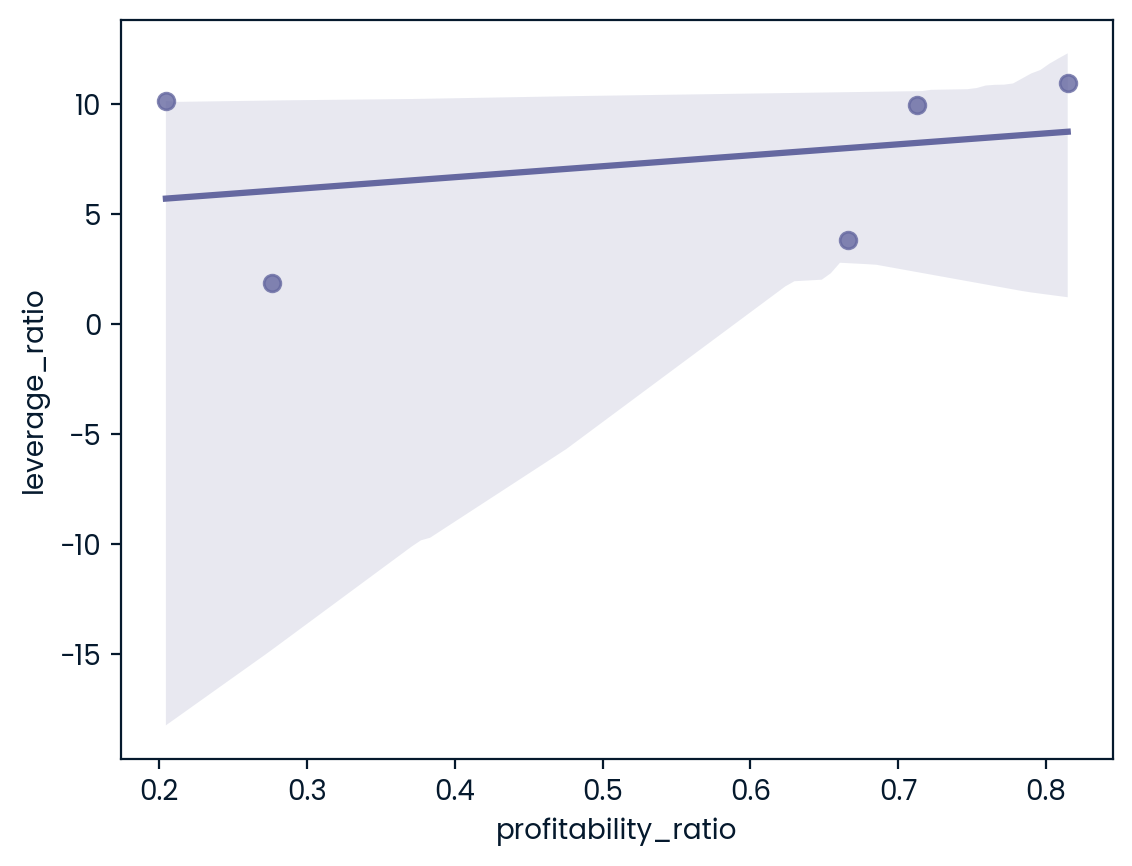

In [72]:
# Plotting the relationship between leverage and profitability ratio of real-estate companies
df_ratios_realestate = df_ratios[df_ratios["comp_type"] == "real_est"]
print(df_ratios_realestate)
pivot_table_data_realestate = df_ratios_realestate.groupby("company")[["profitability_ratio","leverage_ratio"]].mean()
print(pivot_table_data_realestate)
sns.regplot(pivot_table_data_realestate, x= "profitability_ratio", y= "leverage_ratio")


In [73]:
relationship = "positive"